In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Admin/Desktop/New folder/housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()

In [10]:
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_val_and_test,Y_train,Y_val_and_test = train_test_split(X_scale, Y, test_size =0.3)

In [14]:
X_val,X_test,Y_val,Y_test =train_test_split(X_val_and_test,Y_val_and_test,test_size =0.5)

In [15]:
print(X_train.shape,X_val.shape,X_test.shape,Y_train.shape,Y_val.shape,Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
model = Sequential([    Dense(32, activation='relu', input_shape=(10,)),    Dense(32, activation='relu'),    Dense(1, activation='sigmoid'),])

In [34]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
hist =model.fit(X_train, Y_train,batch_size=32,epochs=100,validation_data=(X_val,Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 1ms/sample - loss: 0.6905 - accuracy: 0.5039 - val_loss: 0.6887 - val_accuracy: 0.5251
Epoch 2/100
1022/1022 [==============================] - 0s 98us/sample - loss: 0.6888 - accuracy: 0.5108 - val_loss: 0.6873 - val_accuracy: 0.5571
Epoch 3/100
1022/1022 [==============================] - 0s 94us/sample - loss: 0.6874 - accuracy: 0.5538 - val_loss: 0.6861 - val_accuracy: 0.5799
Epoch 4/100
1022/1022 [==============================] - 0s 91us/sample - loss: 0.6863 - accuracy: 0.5685 - val_loss: 0.6850 - val_accuracy: 0.6256
Epoch 5/100
1022/1022 [==============================] - 0s 98us/sample - loss: 0.6852 - accuracy: 0.6311 - val_loss: 0.6839 - val_accuracy: 0.6621
Epoch 6/100
1022/1022 [==============================] - 0s 87us/sample - loss: 0.6842 - accuracy: 0.6389 - val_loss: 0.6828 - val_accuracy: 0.6986
Epoch 7/100
1022/1022 [==============================] - 0s 94us/s

In [36]:
model.evaluate(X_test,Y_test)[1]

219/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8630137

In [37]:
import matplotlib.pyplot as plt

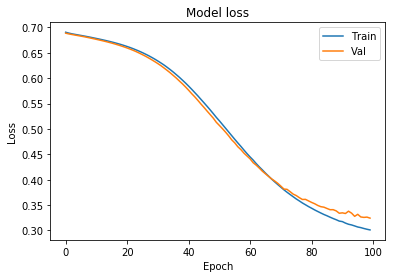

In [38]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

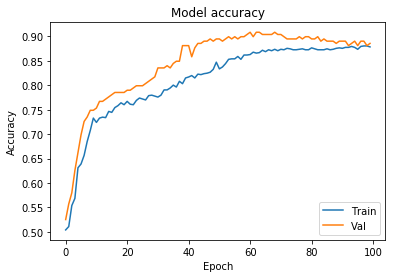

In [42]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='lower right')
plt.show()